In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

#warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use(style='seaborn')

In [3]:
%%time
train_transaction = pd.read_csv('train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('test_transaction.csv', index_col='TransactionID')

train_identity = pd.read_csv('train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('sample_submission.csv', index_col='TransactionID')

train = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)

print(train.shape)
print(test.shape)

y_train = train['isFraud'].copy()
del train_transaction, train_identity, test_transaction, test_identity

#x_train = train.drop('isFraud', axis=1)
x_train = train.copy()
x_test = test.copy()

del train, test

FileNotFoundError: [Errno 2] No such file or directory: 'train_transaction.csv'

In [4]:
x_train_new = x_train.copy()

####### feature enginearing for train

x_train_new['M1'] = x_train_new['M1'].fillna('N')
x_train_new['M2'] = x_train_new['M2'].fillna('N')
x_train_new['M3'] = x_train_new['M3'].fillna('N')
x_train_new['M4'] = x_train_new['M4'].fillna('N')
x_train_new['M5'] = x_train_new['M5'].fillna('N')
x_train_new['M6'] = x_train_new['M6'].fillna('N')
x_train_new['M7'] = x_train_new['M7'].fillna('N')
x_train_new['M8'] = x_train_new['M8'].fillna('N')
x_train_new['M9'] = x_train_new['M9'].fillna('N')

x_train_new['D2'] = x_train_new['D2'].fillna(1000)
x_train_new['D3'] = x_train_new['D3'].fillna(1000)
x_train_new['D4'] = x_train_new['D4'].fillna(1000)
x_train_new['D5'] = x_train_new['D5'].fillna(1000)
x_train_new['D6'] = x_train_new['D6'].fillna(1000)
x_train_new['D7'] = x_train_new['D7'].fillna(1000)
x_train_new['D8'] = x_train_new['D8'].fillna(1000)
x_train_new['D9'] = x_train_new['D9'].fillna(1000)
x_train_new['D10'] = x_train_new['D10'].fillna(1000)
x_train_new['D11'] = x_train_new['D11'].fillna(1000)
x_train_new['D12'] = x_train_new['D12'].fillna(1000)
x_train_new['D13'] = x_train_new['D13'].fillna(1000)
x_train_new['D14'] = x_train_new['D14'].fillna(1000)
x_train_new['D15'] = x_train_new['D15'].fillna(1000)

x_train_new['addr1'] = x_train_new['addr1'].fillna(1111)
x_train_new['addr2'] = x_train_new['addr2'].fillna(1111)
x_train_new['dist1'] = x_train_new['dist1'].fillna(1111)
x_train_new['dist2'] = x_train_new['dist2'].fillna(1111)

x_train_new['R_emaildomain'] = x_train_new['R_emaildomain'].fillna('N')

x_train_new['R_NDomian'] = x_train_new['R_emaildomain'].apply(lambda x : 1 if x == 'N' else 0)
x_train_new['P_GmailDomain'] = x_train_new['P_emaildomain'].apply(lambda x : 1 if x == 'gmail.com' else 0)
x_train_new['R_GmailDomain'] = x_train_new['R_emaildomain'].apply(lambda x : 1 if x == 'gmail.com' else 0)


################## now we make new columns ###########################


########### C3 seems sooooo important so we try to amplify its importance by duplicating it !
x_train_new['C3Amp1'] = x_train_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_train_new['C3Amp2'] = x_train_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_train_new['C3Amp3'] = x_train_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_train_new['C3Amp4'] = x_train_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_train_new['C3Amp5'] = x_train_new['C3'].apply(lambda x : 1 if x == 0 else 0)



x_train_new['C1_new'] = x_train_new['C1'].apply(lambda x : 1 if int(x)  in (1, 2, 3, 4, 5) else 0)
x_train_new['C2_new'] = x_train_new['C2'].apply(lambda x : 1 if int(x)  in (1, 2) else 0)
x_train_new['C4_new'] = x_train_new['C4'].apply(lambda x : 1 if int(x)  in (1, 0) else 0)
x_train_new['C5_new'] = x_train_new['C5'].apply(lambda x : 1 if int(x) == 0 else 0)
x_train_new['C6_new'] = x_train_new['C6'].apply(lambda x : 1 if int(x)  in (1, 2) else 0)
x_train_new['C7_new'] = x_train_new['C7'].apply(lambda x : 1 if int(x) == 0 else 0)
x_train_new['C8_new'] = x_train_new['C8'].apply(lambda x : 1 if int(x)  in (0, 1, 2) else 0)
x_train_new['C9_new'] = x_train_new['C9'].apply(lambda x : 1 if int(x)  in (1, 0) else 0)
x_train_new['C10_new'] = x_train_new['C10'].apply(lambda x : 1 if int(x)  in (1, 0) else 0)
x_train_new['C11_new'] = x_train_new['C11'].apply(lambda x : 1 if int(x)  in (1, 2, 3) else 0)
x_train_new['C12_new'] = x_train_new['C12'].apply(lambda x : 1 if int(x)  in (1, 0) else 0)
x_train_new['C13_new'] = x_train_new['C13'].apply(lambda x : 1 if int(x)  in (1, 0, 2, 3) else 0)
x_train_new['C14_new'] = x_train_new['C14'].apply(lambda x : 1 if int(x)  in (1, 0, 2) else 0)




##################################### if you're wondering what 1000 and 9999 are, 1000 is a mere replacement of null and 9999 i just there because it gave me
##################################### an error when i used (1000) and, i used "in (1000)"" and not ""==1000" because i was copy pasting the previous codes
x_train_new['D1_new'] = x_train_new['D1'].apply(lambda x : 1 if x  in (0, 9999) else 0)
x_train_new['D2_new'] = x_train_new['D2'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D3_new'] = x_train_new['D3'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_train_new['D4_new'] = x_train_new['D4'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_train_new['D5_new'] = x_train_new['D5'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_train_new['D6_new'] = x_train_new['D6'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D7_new'] = x_train_new['D7'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D8_new'] = x_train_new['D8'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D9_new'] = x_train_new['D9'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D10_new'] = x_train_new['D10'].apply(lambda x : 1 if x  in (0, 9999) else 0)
x_train_new['D11_new'] = x_train_new['D11'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D12_new'] = x_train_new['D12'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D13_new'] = x_train_new['D13'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D14_new'] = x_train_new['D14'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_train_new['D15_new'] = x_train_new['D15'].apply(lambda x : 1 if x  in (1000, 0) else 0)

x_train_new['card3_new'] = x_train_new['card3'].apply(lambda x : 1 if x  in (150, 185) else 0)
x_train_new['card5_new'] = x_train_new['card5'].apply(lambda x : 1 if x  in (226, 224) else 0)

x_train_new['dist1_new'] = x_train_new['dist1'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_train_new['dist2_new'] = x_train_new['dist2'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_train_new['addr1_new'] = x_train_new['addr1'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_train_new['addr2_new'] = x_train_new['addr2'].apply(lambda x : 1 if x  in (1111, 87) else 0)



x_train_new = x_train_new.drop(['P_emaildomain', 'P_emaildomain', 
                                 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 
                                  'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 
                                     'card3', 'card5', 'dist1', 'dist2', 'addr1', 'addr2'], axis=1)


x_train_new = pd.get_dummies(x_train_new, columns=['M2','M3','M4','M5','M6','M7','M8','M9', 'ProductCD', 'card4', 'card6'])



x_train = x_train_new.copy()
del(x_train_new)



In [5]:
### test doesnt have this col so we'll just remove it from train too
x_train = x_train.drop(['card6_debit or credit'], axis=1)

In [6]:
####### feature enginearing
x_test_new = x_test.copy()

x_test_new['M1'] = x_test_new['M1'].fillna('N')
x_test_new['M2'] = x_test_new['M2'].fillna('N')
x_test_new['M3'] = x_test_new['M3'].fillna('N')
x_test_new['M4'] = x_test_new['M4'].fillna('N')
x_test_new['M5'] = x_test_new['M5'].fillna('N')
x_test_new['M6'] = x_test_new['M6'].fillna('N')
x_test_new['M7'] = x_test_new['M7'].fillna('N')
x_test_new['M8'] = x_test_new['M8'].fillna('N')
x_test_new['M9'] = x_test_new['M9'].fillna('N')

x_test_new['D2'] = x_test_new['D2'].fillna(1000)
x_test_new['D3'] = x_test_new['D3'].fillna(1000)
x_test_new['D4'] = x_test_new['D4'].fillna(1000)
x_test_new['D5'] = x_test_new['D5'].fillna(1000)
x_test_new['D6'] = x_test_new['D6'].fillna(1000)
x_test_new['D7'] = x_test_new['D7'].fillna(1000)
x_test_new['D8'] = x_test_new['D8'].fillna(1000)
x_test_new['D9'] = x_test_new['D9'].fillna(1000)
x_test_new['D10'] = x_test_new['D10'].fillna(1000)
x_test_new['D11'] = x_test_new['D11'].fillna(1000)
x_test_new['D12'] = x_test_new['D12'].fillna(1000)
x_test_new['D13'] = x_test_new['D13'].fillna(1000)
x_test_new['D14'] = x_test_new['D14'].fillna(1000)
x_test_new['D15'] = x_test_new['D15'].fillna(1000)

x_test_new['addr1'] = x_test_new['addr1'].fillna(1111)
x_test_new['addr2'] = x_test_new['addr2'].fillna(1111)
x_test_new['dist1'] = x_test_new['dist1'].fillna(1111)
x_test_new['dist2'] = x_test_new['dist2'].fillna(1111)

x_test_new['R_emaildomain'] = x_test_new['R_emaildomain'].fillna('N')

x_test_new['R_NDomian'] = x_test_new['R_emaildomain'].apply(lambda x : 1 if x == 'N' else 0)
x_test_new['P_GmailDomain'] = x_test_new['P_emaildomain'].apply(lambda x : 1 if x == 'gmail.com' else 0)
x_test_new['R_GmailDomain'] = x_test_new['R_emaildomain'].apply(lambda x : 1 if x == 'gmail.com' else 0)


################## now we make new columns ###########################


########### C3 seems sooooo important so we try to amplify its importance by duplicating it !
x_test_new['C3Amp1'] = x_test_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C3Amp2'] = x_test_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C3Amp3'] = x_test_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C3Amp4'] = x_test_new['C3'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C3Amp5'] = x_test_new['C3'].apply(lambda x : 1 if x == 0 else 0)



x_test_new['C1_new'] = x_test_new['C1'].apply(lambda x : 1 if x  in (1, 2, 3, 4, 5) else 0)
x_test_new['C2_new'] = x_test_new['C2'].apply(lambda x : 1 if x  in (1, 2) else 0)
x_test_new['C4_new'] = x_test_new['C4'].apply(lambda x : 1 if x  in (1, 0) else 0)
x_test_new['C5_new'] = x_test_new['C5'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C6_new'] = x_test_new['C6'].apply(lambda x : 1 if x  in (1, 2) else 0)
x_test_new['C7_new'] = x_test_new['C7'].apply(lambda x : 1 if x == 0 else 0)
x_test_new['C8_new'] = x_test_new['C8'].apply(lambda x : 1 if x  in (0, 1, 2) else 0)
x_test_new['C9_new'] = x_test_new['C9'].apply(lambda x : 1 if x  in (1, 0) else 0)
x_test_new['C10_new'] = x_test_new['C10'].apply(lambda x : 1 if x  in (1, 0) else 0)
x_test_new['C11_new'] = x_test_new['C11'].apply(lambda x : 1 if x  in (1, 2, 3) else 0)
x_test_new['C12_new'] = x_test_new['C12'].apply(lambda x : 1 if x  in (1, 0) else 0)
x_test_new['C13_new'] = x_test_new['C13'].apply(lambda x : 1 if x  in (1, 0, 2, 3) else 0)
x_test_new['C14_new'] = x_test_new['C14'].apply(lambda x : 1 if x  in (1, 0, 2) else 0)




##################################### if you're wondering what 1000 and 9999 are, 1000 is a mere replacement of null and 9999 i just there because it gave me
##################################### an error when i used (1000) and, i used in (1000) and not ==1000 because i was copy pasting the previous codes
x_test_new['D1_new'] = x_test_new['D1'].apply(lambda x : 1 if x  in (0, 9999) else 0)
x_test_new['D2_new'] = x_test_new['D2'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D3_new'] = x_test_new['D3'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_test_new['D4_new'] = x_test_new['D4'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_test_new['D5_new'] = x_test_new['D5'].apply(lambda x : 1 if x  in (1000, 0) else 0)
x_test_new['D6_new'] = x_test_new['D6'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D7_new'] = x_test_new['D7'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D8_new'] = x_test_new['D8'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D9_new'] = x_test_new['D9'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D10_new'] = x_test_new['D10'].apply(lambda x : 1 if x  in (0, 9999) else 0)
x_test_new['D11_new'] = x_test_new['D11'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D12_new'] = x_test_new['D12'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D13_new'] = x_test_new['D13'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D14_new'] = x_test_new['D14'].apply(lambda x : 1 if x  in (1000, 9999) else 0)
x_test_new['D15_new'] = x_test_new['D15'].apply(lambda x : 1 if x  in (1000, 0) else 0)

x_test_new['card3_new'] = x_test_new['card3'].apply(lambda x : 1 if x  in (150, 185) else 0)
x_test_new['card5_new'] = x_test_new['card5'].apply(lambda x : 1 if x  in (226, 224) else 0)

x_test_new['dist1_new'] = x_test_new['dist1'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_test_new['dist2_new'] = x_test_new['dist2'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_test_new['addr1_new'] = x_test_new['addr1'].apply(lambda x : 1 if x  in (1111, 9999) else 0)
x_test_new['addr2_new'] = x_test_new['addr2'].apply(lambda x : 1 if x  in (1111, 87) else 0)



x_test_new = x_test_new.drop(['P_emaildomain', 'P_emaildomain', 
                                 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 
                                  'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 
                                     'card3', 'card5', 'dist1', 'dist2', 'addr1', 'addr2'], axis=1)


x_test_new = pd.get_dummies(x_test_new, columns=['M2','M3','M4','M5','M6','M7','M8','M9', 'ProductCD', 'card4', 'card6'])



x_test = x_test_new.copy()
del(x_test_new)


In [7]:

def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       int8")
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       int16")
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       int32")
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       int64")
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       float16")
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       float32")
                    df[col] = df[col].astype(np.float32)
                else:
                    print("\n  The Column '" + col + "' is converted from : " + str(df[col].dtype) +  "        ---->       float64")
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
    
x_train = reduce_mem_usage(x_train)
x_test = reduce_mem_usage(x_test)

om : float64        ---->       int16

  The Column 'V174' is converted from : float64        ---->       int16

  The Column 'V175' is converted from : float64        ---->       int16

  The Column 'V176' is converted from : float64        ---->       int16

  The Column 'V177' is converted from : float64        ---->       int16

  The Column 'V178' is converted from : float64        ---->       int16

  The Column 'V179' is converted from : float64        ---->       int16

  The Column 'V180' is converted from : float64        ---->       int16

  The Column 'V181' is converted from : float64        ---->       int16

  The Column 'V182' is converted from : float64        ---->       int16

  The Column 'V183' is converted from : float64        ---->       int16

  The Column 'V184' is converted from : float64        ---->       int16

  The Column 'V185' is converted from : float64        ---->       int16

  The Column 'V186' is converted from : float64        ---->       int16


In [8]:
#print(x_test.shape, x_train.shape)
#x_train
#x_test

In [9]:
columns = x_train.drop(['isFraud'], axis=1).columns.values

In [10]:
for i in columns : 
    if i not in x_test.columns :
        print(i)

id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38


In [11]:
x_test.columns = columns


In [12]:
from tqdm import tqdm

for f in tqdm(x_train.drop(['isFraud'], axis=1).columns):    
    if x_train[f].dtype=='object' or x_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values) + list(x_test[f].values))
        x_train[f] = lbl.transform(list(x_train[f].values))
        x_test[f] = lbl.transform(list(x_test[f].values))   

100%|██████████| 464/464 [00:00<00:00, 25772.48it/s]


In [13]:
print(x_train.shape)
print(x_test.shape)

(590540, 465)
(506691, 464)


In [14]:
#x_train

In [15]:
# for i in x_train.columns : 
#     f = x_train[i].mean()
#     #if f == 'nan' or f == 'inf' or f == '-inf' : 
#     print('Mean of     ->      ', i, '        ->     ', f)

In [16]:
def fill_nan_values(df):
    
    start_nan = df.isnull().sum().sum()
    print('amount of nan values are : ', start_nan)
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            #df[col] = df[col].fillna(df[col].mean())
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

    end_nan = df.isnull().sum().sum()
    print('Nan amount after filling is: ', end_nan)
    
    
    return df

In [17]:
x_train.sort_values(by=['isFraud'], inplace=True)
x_train_split = x_train.groupby(x_train.isFraud)

x_train_fraud = x_train_split.get_group(1)
x_train_notfraud = x_train_split.get_group(0)

x_train_fraud = x_train_fraud.drop(['isFraud'], axis=1)
x_train_notfraud = x_train_notfraud.drop(['isFraud'], axis=1)

print('Imputation of Fraudulent values in train : ')
x_train_fraud = fill_nan_values(x_train_fraud)
print('\nImputation of nonFraudulent values in train : ')
x_train_notfraud = fill_nan_values(x_train_notfraud)
print('\nImputation of values in test : ')
x_test_no_nan = fill_nan_values(x_test)
del(x_test)

Imputation of Fraudulent values in train : 
amount of nan values are :  3003180
Nan amount after filling is:  0

Imputation of nonFraudulent values in train : 
amount of nan values are :  103122168
Nan amount after filling is:  0

Imputation of values in test : 
amount of nan values are :  83042804
Nan amount after filling is:  0


In [18]:
x_train_fraud['R_emaildomain'] = x_train_fraud['R_emaildomain'].apply(lambda x : 1 if x in ('N', 'gmail.com') else 0)
x_train_fraud['id_23_ano'] = x_train_fraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:ANONYMOUS' else 0)
x_train_fraud['id_23_hid'] = x_train_fraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:HIDDEN' else 0)
x_train_fraud['id_23_tra'] = x_train_fraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:TRANSPARENT' else 0)

x_train_fraud['id_34_0'] = x_train_fraud['id_34'].apply(lambda x : 1 if x == 'match_status:0' else 0)
x_train_fraud['id_34_2'] = x_train_fraud['id_34'].apply(lambda x : 1 if x == 'match_status:2' else 0)
x_train_fraud['id_34_1'] = x_train_fraud['id_34'].apply(lambda x : 1 if x == 'match_status:1' else 0)

x_train_fraud = x_train_fraud.drop(['id_23', 'id_34', 'DeviceInfo', 'id_31', 'id_30', 'id_33'], axis=1)





x_train_notfraud['R_emaildomain'] = x_train_notfraud['R_emaildomain'].apply(lambda x : 1 if x in ('N', 'gmail.com') else 0)
x_train_notfraud['id_23_ano'] = x_train_notfraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:ANONYMOUS' else 0)
x_train_notfraud['id_23_hid'] = x_train_notfraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:HIDDEN' else 0)
x_train_notfraud['id_23_tra'] = x_train_notfraud['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:TRANSPARENT' else 0)

x_train_notfraud['id_34_0'] = x_train_notfraud['id_34'].apply(lambda x : 1 if x == 'match_status:0' else 0)
x_train_notfraud['id_34_2'] = x_train_notfraud['id_34'].apply(lambda x : 1 if x == 'match_status:2' else 0)
x_train_notfraud['id_34_1'] = x_train_notfraud['id_34'].apply(lambda x : 1 if x == 'match_status:1' else 0)

x_train_notfraud = x_train_notfraud.drop(['id_23', 'id_34', 'DeviceInfo', 'id_31', 'id_30', 'id_33'], axis=1)





x_test_no_nan['R_emaildomain'] = x_test_no_nan['R_emaildomain'].apply(lambda x : 1 if x in ('N', 'gmail.com') else 0)
x_test_no_nan['id_23_ano'] = x_test_no_nan['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:ANONYMOUS' else 0)
x_test_no_nan['id_23_hid'] = x_test_no_nan['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:HIDDEN' else 0)
x_test_no_nan['id_23_tra'] = x_test_no_nan['id_23'].apply(lambda x : 1 if x == 'IP_PROXY:TRANSPARENT' else 0)

x_test_no_nan['id_34_0'] = x_test_no_nan['id_34'].apply(lambda x : 1 if x == 'match_status:0' else 0)
x_test_no_nan['id_34_2'] = x_test_no_nan['id_34'].apply(lambda x : 1 if x == 'match_status:2' else 0)
x_test_no_nan['id_34_1'] = x_test_no_nan['id_34'].apply(lambda x : 1 if x == 'match_status:1' else 0)


x_test_no_nan = x_test_no_nan.drop(['id_23', 'id_34', 'DeviceInfo', 'id_31', 'id_30', 'id_33'], axis=1)




x_train_notfraud = pd.get_dummies(x_train_notfraud, columns=['M1', 'id_12', 'id_15', 'id_16', 'id_27', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType'])
x_train_fraud = pd.get_dummies(x_train_fraud, columns=['M1', 'id_12', 'id_15', 'id_16', 'id_27', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType'])

x_test_no_nan = pd.get_dummies(x_test_no_nan, columns=['M1', 'id_12', 'id_15', 'id_16', 'id_27', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType'])


In [19]:
print(x_test_no_nan.shape, x_train_fraud.shape, x_train_notfraud.shape)

(506691, 478) (20663, 478) (569877, 478)


In [20]:
p = ["M1_0.0", "M1_1.0", "id_12_1", "id_12_0", "id_15_0", "id_15_1", "id_15_2", "id_16_0", "id_16_1", "id_27_Found", "id_27_NotFound", "id_28_0", "id_28_1", "id_29_0", "id_29_1", "id_35_1", "id_35_0", "id_36_0", "id_36_1", "id_37_1", "id_37_0", "id_38_1", "id_38_0"]

for i in p : 
    if i in x_test_no_nan.columns.tolist() : 
        x_test_no_nan = x_test_no_nan.drop([i], axis=1)

    if i in x_train_fraud.columns.tolist() : 
        x_train_fraud = x_train_fraud.drop([i], axis=1)

    if i in x_train_notfraud.columns.tolist() : 
        x_train_notfraud = x_train_notfraud.drop([i], axis=1)

In [21]:
for col in x_train.columns : 
    print(col, x_train[col].isnull().sum().sum() / 590540 )

isFraud 0.0
TransactionDT 0.0
TransactionAmt 0.0
card1 0.0
card2 0.015126833068039422
R_emaildomain 0.0
M1 0.0
V1 0.47293494090154775
V2 0.47293494090154775
V3 0.47293494090154775
V4 0.47293494090154775
V5 0.47293494090154775
V6 0.47293494090154775
V7 0.47293494090154775
V8 0.47293494090154775
V9 0.47293494090154775
V10 0.47293494090154775
V11 0.47293494090154775
V12 0.1288193856470349
V13 0.1288193856470349
V14 0.1288193856470349
V15 0.1288193856470349
V16 0.1288193856470349
V17 0.1288193856470349
V18 0.1288193856470349
V19 0.1288193856470349
V20 0.1288193856470349
V21 0.1288193856470349
V22 0.1288193856470349
V23 0.1288193856470349
V24 0.1288193856470349
V25 0.1288193856470349
V26 0.1288193856470349
V27 0.1288193856470349
V28 0.1288193856470349
V29 0.1288193856470349
V30 0.1288193856470349
V31 0.1288193856470349
V32 0.1288193856470349
V33 0.1288193856470349
V34 0.1288193856470349
V35 0.2861262573238053
V36 0.2861262573238053
V37 0.2861262573238053
V38 0.2861262573238053
V39 0.2861262

In [22]:
x_test_no_nan = x_test_no_nan.drop(['id_34_1', 'id_34_2'], axis=1)
x_train_fraud = x_train_fraud.drop(['id_34_1', 'id_34_2'], axis=1)
x_train_notfraud = x_train_notfraud.drop(['id_34_1', 'id_34_2'], axis=1)

In [23]:
def normalize_dataframe(df):

    for col in df.columns:
        df[col] = df[col] / df[col].max()

    df = reduce_mem_usage(df)
    return df


x_train_notfraud = normalize_dataframe(x_train_notfraud)
x_train_fraud = normalize_dataframe(x_train_fraud)
x_test_no_nan = normalize_dataframe(x_test_no_nan)

print(x_train_notfraud.info())
print(x_train_fraud.info())
print(x_test_no_nan.info())


rom : float32        ---->       int16

  The Column 'V215' is converted from : float32        ---->       int16

  The Column 'V216' is converted from : float32        ---->       int16

  The Column 'V217' is converted from : float16        ---->       int16

  The Column 'V218' is converted from : float16        ---->       int16

  The Column 'V219' is converted from : float16        ---->       int16

  The Column 'V220' is converted from : float16        ---->       int16

  The Column 'V221' is converted from : float16        ---->       int16

  The Column 'V222' is converted from : float16        ---->       int16

  The Column 'V223' is converted from : float16        ---->       int16

  The Column 'V224' is converted from : float16        ---->       int16

  The Column 'V225' is converted from : float16        ---->       int16

  The Column 'V226' is converted from : float16        ---->       int16

  The Column 'V227' is converted from : float16        ---->       int16

In [24]:
# for col in x_train_notfraud.columns : 
#     if x_train_notfraud[col].dtype == 'float64' : 
#         print(col)

# x_train_notfraud = x_train_notfraud.drop(['id_01', 'id_04', 'id_06', 'id_08', 'id_10'], axis=1)
# x_train_fraud = x_train_fraud.drop(['id_01', 'id_04', 'id_06', 'id_08', 'id_10'], axis=1)
# x_test_no_nan = x_test_no_nan.drop(['id_01', 'id_04', 'id_06', 'id_08', 'id_10'], axis=1)

In [25]:
#x_train_fraud = fill_nan_values(x_train_fraud)
for col in x_train_fraud.columns : 
    if len(x_train_fraud[col].mode()) == 0 : 
        x_train_fraud[col] = x_train_fraud[col].fillna(0)
    else :
        x_train_fraud[col] = x_train_fraud[col].fillna(x_train_fraud[col].mode())



for col in x_test_no_nan.columns : 
    if len(x_test_no_nan[col].mode()) == 0 : 
        x_test_no_nan[col] = x_test_no_nan[col].fillna(0)
    else :
        x_test_no_nan[col] = x_test_no_nan[col].fillna(x_test_no_nan[col].mode())



for col in x_train_notfraud.columns : 
    if len(x_train_notfraud[col].mode()) == 0 : 
        x_train_notfraud[col] = x_train_notfraud[col].fillna(0)
    else :
        x_train_notfraud[col] = x_train_notfraud[col].fillna(x_train_notfraud[col].mode())


print(x_test_no_nan.isnull().sum().sum(), x_train_fraud.isnull().sum().sum(), x_train_notfraud.isnull().sum().sum())



1479042 57992 1685272


Epoch 1/10
14247/14247 [==============================] - 33s 2ms/step - loss: nan - val_loss: nan
Epoch 2/10
14247/14247 [==============================] - 32s 2ms/step - loss: nan - val_loss: nan
Epoch 3/10
14247/14247 [==============================] - 35s 2ms/step - loss: nan - val_loss: nan
Epoch 4/10
14247/14247 [==============================] - 32s 2ms/step - loss: nan - val_loss: nan
Epoch 5/10
14247/14247 [==============================] - 32s 2ms/step - loss: nan - val_loss: nan
Epoch 6/10
14247/14247 [==============================] - 32s 2ms/step - loss: nan - val_loss: nan
Epoch 7/10
14247/14247 [==============================] - 32s 2ms/step - loss: nan - val_loss: nan
Epoch 00007: early stopping


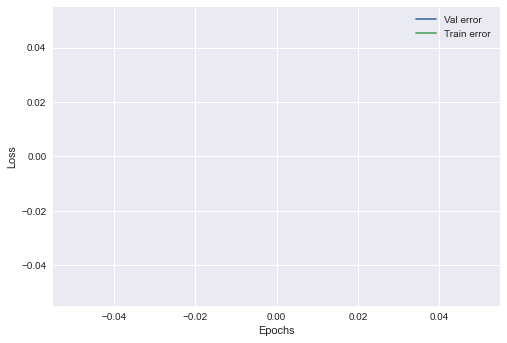

In [26]:
#del(x_test)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout,Input,BatchNormalization , Add

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam




es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=7)

lrr= ReduceLROnPlateau(monitor='val_loss',
                       factor=0.1, 
                       patience=3, 
                       min_lr=1e-9)



encoder_input = Input(474,name = 'input_encoder')
encoder = Dense(128, activation='tanh',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer4')(encoder)
encoder = Dense(64, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(32, activation='relu',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
#Encoder.summary()



decoder_input = Input(32,name = 'input_decoder')
decoder = Dense(32, activation='tanh',name = 'decoder_layer1')(decoder_input)
decoder = Dense(64, activation='tanh',name = 'decoder_layer2')(decoder)
decoder = BatchNormalization(name = 'decoder_layer3')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer4')(decoder)
decoder = Dense(64, activation='relu',name = 'decoder_layer5')(decoder)
decoder = Dense(128, activation='relu',name = 'decoder_layer6')(decoder)
decoder_output = Dense(474,activation = 'sigmoid',name ='output_layer')(decoder)

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
#Decoder.summary()



autoencoder_input = Input(474, name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data], name = 'AutoEncoder')

#autoencoder.summary()


sgd = SGD(lr=0.005, momentum=0.99)
autoencoder.compile(optimizer=sgd, loss='mae')



history = autoencoder.fit(x_train_notfraud, x_train_notfraud,
                    batch_size = 64,
                    validation_split = 0.25,
                              epochs= 20,
                              callbacks=[es , lrr])

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')


plt.show()


In [27]:
x_train = pd.concat([x_train_fraud, x_train_notfraud])
print(x_train_notfraud.shape, x_train_fraud.shape, x_train.shape)


FraudArr = np.array([1 for i in range(20663)])
notFraudArr = np.array([0 for i in range(569877)])
isFraudArr = np.concatenate([FraudArr, notFraudArr])
x_train['isFraud'] = isFraudArr
x_train

(569877, 474) (20663, 474) (590540, 474)


,TransactionDT,TransactionAmt,card1,card2,R_emaildomain,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32,R_NDomian,P_GmailDomain,R_GmailDomain,C3Amp1,C3Amp2,C3Amp3,C3Amp4,C3Amp5,C1_new,C2_new,C4_new,C5_new,C6_new,C7_new,C8_new,C9_new,C10_new,C11_new,C12_new,C13_new,C14_new,D1_new,D2_new,D3_new,D4_new,D5_new,D6_new,D7_new,D8_new,D9_new,D10_new,D11_new,D12_new,D13_new,D14_new,D15_new,card3_new,card5_new,dist1_new,dist2_new,addr1_new,addr2_new,M2_F,M2_N,M2_T,M3_F,M3_N,M3_T,M4_M0,M4_M1,M4_M2,M4_N,M5_F,M5_N,M5_T,M6_F,M6_N,M6_T,M7_F,M7_N,M7_T,M8_F,M8_N,M8_T,M9_F,M9_N,M9_T,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,id_23_ano,id_23_hid,id_23_tra,id_34_0,M1_F,M1_N,M1_T,id_12_Found,id_12_NotFound,id_15_Found,id_15_New,id_15_Unknown,id_16_Found,id_16_NotFound,id_28_Found,id_28_New,id_29_Found,id_29_NotFound,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T,DeviceType_desktop,DeviceType_mobile,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3345521,0.562012,0.077026,0.696777,0.286621,1.0,1.0,0.166626,0.142822,0.250000,0.166626,0.166626,0.166626,0.199951,0.199951,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.199951,0.166626,0.0,0.0,0.076904,0.076904,0.199951,0.142822,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018524,0.018524,0.0,0.0,1.0,0.0,0.0,0.020828,0.020828,0.166626,0.083313,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.125000,0.033325,0.0,0.0,0.0,0.0,0.166626,0.142822,0.0,0.0,1.0,0.166626,0.125000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033325,0.032257,0.0,0.0,0.0,0.166626,0.166626,0.0,0.0,0.033325,0.033325,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0

In [28]:
from sklearn.utils import shuffle
x_train = shuffle(x_train)

In [29]:
x_train.isnull().sum().sum()


1743264

In [30]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve


valid_x_predictions = autoencoder.predict(x_train.drop(['isFraud'], axis=1))
mse = np.mean(np.abs(x_train.drop(['isFraud'], axis=1) - valid_x_predictions), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': x_train['isFraud']})


threshold_fixed = 0.032
LABELS = ["Real","Fraud"]


pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(12, 12))


<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

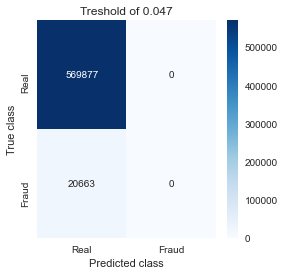

In [31]:
import seaborn as sns

threshold_fixed = 0.047
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(4, 4))


sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap="Blues")
plt.title("Treshold of " + str(threshold_fixed))
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [32]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve


fpr, tpr, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('ROC curve')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [94]:
thresholds = [0.037,0.047, 0.057,0.067, 0.087]

  
for threshold in thresholds:
    
    groups = error_df.groupby('True_class')
    fig, ax = plt.subplots()

    for name, group in groups:
        ax.plot(group.index, group.Reconstruction_error, marker='o', ms=0.1, linestyle='',
                label= "Fraud" if name == 1 else "Normal")
    ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="g", zorder=100, label='Threshold')
    ax.legend()
    ax.set_ylim(0, 1.0)  
    #ax2.set_ylim(0, .12)  
    plt.title("mse for different classes")
    plt.ylabel("mse")
    plt.xlabel("Data point index")
    plt.show();

KeyError: 'true_class'

In [25]:
#test_transaction = pd.read_csv('test_transaction.csv', index_col='TransactionID')
#test_identity = pd.read_csv('test_identity.csv', index_col='TransactionID')
#x_test = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)
#x_test.columns = columns

#x_test = reduce_mem_usage(x_test)
#x_test = fill_nan_values(x_test)
#x_test = normalize_dataframe(x_test)
#x_test

In [72]:
test_predictions = autoencoder.predict(x_test_no_nan)






# mae_test = np.mean(np.abs(x_test_no_nan - test_predictions), axis=1)
# isFraud_test = np.array(mae_test)
# for i in range(len(isFraud_test)) : 
#     isFraud_test[i] = 0 if isFraud_test[i] <= threshold_fixed else 1
# isFraud_test




mae_test = np.mean(np.abs(x_test_no_nan - test_predictions), axis=1)
isFraud_test = np.array(mae_test)
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] - threshold_fixed 

minMAE = min(isFraud_test)
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] + abs(minMAE)

maxMAE = max(isFraud_test)
scaler = 1/maxMAE
for i in range(len(isFraud_test)) : 
    isFraud_test[i] = isFraud_test[i] * scaler







test_predictions.shape
submitFile = pd.DataFrame(x_test_no_nan['card1'])





submitFile['isFraud'] = isFraud_test
submitFile = submitFile.drop(['card1'], axis=1)





submitFile.to_csv('submitFile.csv')

